## Setup, Loading Data and CDFs

In [3]:
DATA_NAME = '_-experiments-scaleTesting-sampleLaplace' # size-name-transform-channel

In [4]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()
Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "groupCDFs")).mkdir(exist_ok=True)

GROUP = 'scale'
RERUN = True
CWD

'c:\\Users\\yashd\\Desktop\\hierarchical-bayesian-model-validation\\results\\case-studies\\experiments\\scaleTesting\\_\\sampleLaplace'

In [ ]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

In [ ]:
num_samples = 100000
sigfigs = 4
scale_values = sorted([round_to_sigfigs(x, sigfigs) for x in np.logspace(-0.5, 3, 20)] + [round_to_sigfigs(1/np.sqrt(2), sigfigs), 1])
fake_data = { round_to_sigfigs(i) : np.sort(scipy.stats.laplace.rvs(loc = 0, size = num_samples, scale = i)) for i in scale_values}
fake_total_samples = { i : num_samples for i in scale_values}
fake_total_samples

{0.3162: 100000,
 0.4833: 100000,
 0.7071: 100000,
 0.7386: 100000,
 1: 100000,
 1.129: 100000,
 1.725: 100000,
 2.637: 100000,
 4.03: 100000,
 6.158: 100000,
 9.412: 100000,
 14.38: 100000,
 21.98: 100000,
 33.6: 100000,
 51.35: 100000,
 78.48: 100000,
 119.9: 100000,
 183.3: 100000,
 280.1: 100000,
 428.1: 100000,
 654.3: 100000,
 1000.0: 100000}

In [ ]:
group_data_map = fake_data
group_total_samples = fake_total_samples
if path_dict['transform'] == 'fourier':
    GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)[::3]
else:
    GROUPS = scale_values

cdfs_dir = os.path.join(ROOT_DIR, "results", "CDFs")
cdfs_list = [os.path.join(cdfs_dir, i) for i in os.listdir(cdfs_dir)]
all_cdfs = combine_pickles(cdfs_list[0])
for cdf_dir in cdfs_list[1:]:
    all_cdfs = all_cdfs | combine_pickles(cdf_dir)
    
group_total_samples

KeyboardInterrupt: 

In [ ]:
''' Only need to run commented code once'''
all_cdfs_df = create_kurt_var_ksstat_df(all_cdfs)
coarse_cdf_df = all_cdfs_df[(np.round(all_cdfs_df['r'], 0) == all_cdfs_df['r']) & (np.round(all_cdfs_df['eta'], 0) == all_cdfs_df['eta'])]
var_values_dict = dict()
kurt_values_dict = dict()
master_df = pd.DataFrame(columns=[GROUP]).set_index(GROUP)
all_cdfs_df.head()

c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:824: RuntimeWarning: invalid value encountered in scalar divide
  var_prior = scale * scipy.special.gamma(beta + 1/r)/scipy.special.gamma(beta)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:829: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:829: RuntimeWarning: overflow encountered in scalar power
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:829: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2


,"(r,eta),cdf",r,eta,cdf,variance,kurtosis
0,"((0.02, -1.4), <scipy.interpolate._fitpack2.In...",0.02,-1.4,<scipy.interpolate._fitpack2.InterpolatedUniva...,9.618487e+69,1.391529e+25
1,"((0.02, -1.3), <scipy.interpolate._fitpack2.In...",0.02,-1.3,<scipy.interpolate._fitpack2.InterpolatedUniva...,3.821735e+74,8.172634e+21
2,"((0.02, -1.2), <scipy.interpolate._fitpack2.In...",0.02,-1.2,<scipy.interpolate._fitpack2.InterpolatedUniva...,1.455488e+78,4.131785e+19
3,"((0.02, -1.1), <scipy.interpolate._fitpack2.In...",0.02,-1.1,<scipy.interpolate._fitpack2.InterpolatedUniva...,1.406735e+81,6.947275e+17
4,"((0.02, -1.0), <scipy.interpolate._fitpack2.In...",0.02,-1.0,<scipy.interpolate._fitpack2.InterpolatedUniva...,5.331443e+83,2.562075e+16


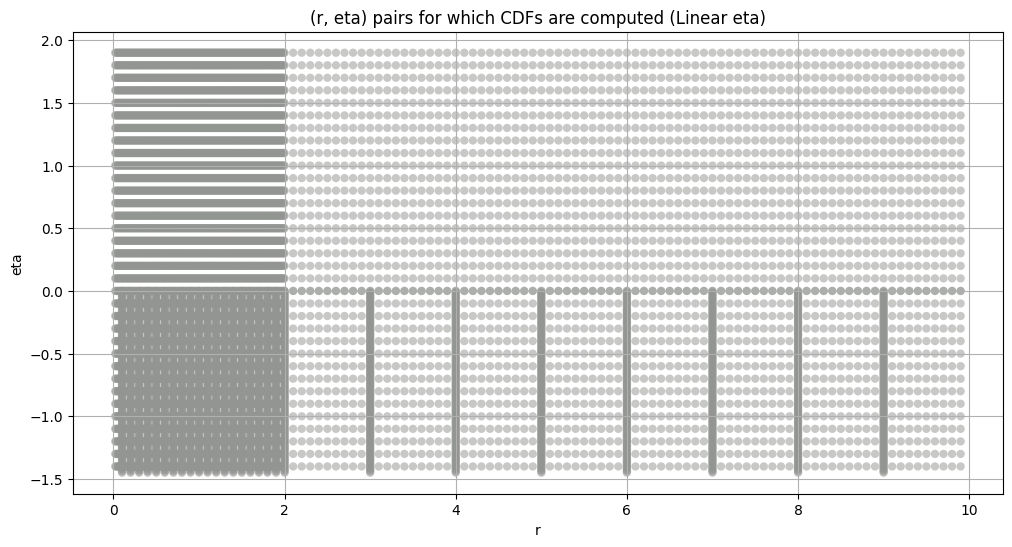

{(0.02,
  -1.4): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x278828a5550>,
 (0.02,
  -1.3): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x278c731e250>,
 (0.02,
  -1.2): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x278c731e510>,
 (0.02,
  -1.1): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x278c731e7d0>,
 (0.02,
  -1.0): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x278c731ea90>,
 (0.02,
  -0.9): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x278c731ed50>,
 (0.02,
  -0.8): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x278c731f010>,
 (0.02,
  -0.7): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x278c731f350>,
 (0.02,
  -0.6): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x278c731f690>,
 (0.02,
  -0.5): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x278c731fa50>,
 (0.02,
  -0.4): <scipy.interpolate._fitpack2.InterpolatedUn

In [ ]:
temp_df = all_cdfs_df[(all_cdfs_df['eta'] < 2) & (all_cdfs_df['r'] < 10)]
create_scatter_plot(temp_df)
temp_df.shape
all_cdfs_df = temp_df
all_cdfs = {x[0] : x[1] for x in temp_df['(r,eta),cdf']}
all_cdfs

## Bootstrapping the Variance and Kurtosis

In [ ]:
n_bootstrap = int(1e3)
bootstrap_size = int(1e3)
ci = 0.99

In [ ]:
bootstrap_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))
master_df_var_kurt_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

if RERUN or not master_df_var_kurt_path.exists():
    for group in GROUPS:
        print(f'{GROUP.capitalize()} {group}')
        obs_var, var_lower, var_upper, var_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                n_bootstrap=n_bootstrap, 
                                                                                bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                metric= np.var, 
                                                                                ci=ci)
        obs_kurt, kurt_lower, kurt_upper, kurt_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                    n_bootstrap=n_bootstrap, 
                                                                                    bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                    metric= stats.kurtosis, ci=ci)  
        master_df.loc[group, 'obs_var'], master_df.loc[group, 'var_lower'], master_df.loc[group, 'var_upper'] = obs_var, var_lower, var_upper
        master_df.loc[group, 'obs_kurt'], master_df.loc[group, 'kurt_lower'], master_df.loc[group, 'kurt_upper'] = obs_kurt, kurt_lower, kurt_upper
        master_df.loc[group, 'total_samples'] = group_total_samples[group]

    master_df.to_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

master_df = pd.read_csv(master_df_var_kurt_path, index_col=GROUP)
var_kurt_df = pd.read_csv(bootstrap_path, index_col=GROUP)
master_df

Scale 0.3162


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:02<00:00, 363.69it/s]


Scale 0.4549


100%|██████████| 1000/1000 [00:02<00:00, 337.15it/s]


Scale 0.6543


100%|██████████| 1000/1000 [00:02<00:00, 354.97it/s]


Scale 0.7071


100%|██████████| 1000/1000 [00:02<00:00, 396.16it/s]


Scale 0.9412


100%|██████████| 1000/1000 [00:02<00:00, 414.95it/s]


Scale 1.354


100%|██████████| 1000/1000 [00:02<00:00, 362.66it/s]


Scale 1.947


100%|██████████| 1000/1000 [00:02<00:00, 368.03it/s]


Scale 2.801


100%|██████████| 1000/1000 [00:02<00:00, 338.77it/s]


Scale 4.03


100%|██████████| 1000/1000 [00:02<00:00, 385.27it/s]


Scale 5.796


100%|██████████| 1000/1000 [00:02<00:00, 384.36it/s]


Scale 8.338


100%|██████████| 1000/1000 [00:02<00:00, 381.86it/s]


Scale 11.99


100%|██████████| 1000/1000 [00:02<00:00, 366.02it/s]


Scale 17.25


100%|██████████| 1000/1000 [00:02<00:00, 382.99it/s]


Scale 24.82


100%|██████████| 1000/1000 [00:02<00:00, 367.83it/s]


Scale 35.7


100%|██████████| 1000/1000 [00:02<00:00, 360.29it/s]


Scale 51.35


100%|██████████| 1000/1000 [00:02<00:00, 348.17it/s]


Scale 73.86


100%|██████████| 1000/1000 [00:02<00:00, 375.41it/s]


Scale 106.2


100%|██████████| 1000/1000 [00:02<00:00, 349.71it/s]


Scale 152.8


100%|██████████| 1000/1000 [00:02<00:00, 353.77it/s]


Scale 219.8


100%|██████████| 1000/1000 [00:02<00:00, 380.94it/s]


Scale 316.2


100%|██████████| 1000/1000 [00:02<00:00, 374.63it/s]


,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples
scale,,,,,,,
0.3162,0.206300,0.170638,0.247663,3.506592,1.493048,6.926868,10000.0
0.4549,0.426410,0.350081,0.503912,2.697154,1.312407,4.876062,10000.0
0.6543,0.876413,0.732798,1.039326,2.856124,1.479667,4.494287,10000.0
0.7071,0.953119,0.795671,1.117629,2.447961,1.162735,4.621293,10000.0
0.9412,1.753462,1.441328,2.090900,3.035933,1.349018,5.786059,10000.0
1.3540,3.568596,2.961106,4.174865,2.987112,1.266996,5.182565,10000.0
1.9470,7.595639,6.322656,9.051443,3.030884,1.503521,4.980338,10000.0
2.8010,15.909049,13.223030,19.088523,3.264279,1.403748,5.947488,10000.0
4.0300,33.304184,27.620224,39.362749,3.056231,1.413275,8.070181,10000.0


## Initial Grid Search and Hypothesis Test Plots

In [ ]:
master_df_combo_path = Path(os.path.join(CWD, "CSVs", "master_df_combo.csv"))

if RERUN or not master_df_combo_path.exists():
    sorted_params = sorted(all_cdfs)
    group_cdf_df_dict = dict()
    ksstats_dict = dict()

    for i, group in enumerate(GROUPS):
        print(f"####\n{GROUP.capitalize()} ", group)
        sample = group_data_map[group]
        group_cdf_df = all_cdfs_df.copy()
        ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs, debug=True)
        master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta'] = initial_param
        print(f"Number of samples: {sample.size}, Without approximation : {master_df.loc[group, 'total_samples']}")
        master_df.loc[group, 'kstest_stat_initial'] = min_stat
        cutoff = stats.kstwo(n=master_df.loc[group, 'total_samples']).isf(0.05)
        master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff

        group_cdf_df = add_tests_to_df(cdfs_df = group_cdf_df, group = group, var_kurt_df = master_df, ksstats = ksstats)
        group_cdf_df_dict[group] = group_cdf_df
        cols = ['pass_var', 'pass_kstest', 'pass_kurt']

        fig = combo_test_plot(group_cdf_df_dict[group], cols, 
                            plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])}", 
                            target_var = master_df.loc[group, 'obs_var'],
                            best_param = initial_param)
        
        fig.figure.savefig(os.path.join(CWD, "plots", f"full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)

        # Optional: Create plots of bootstrapped variance and kurtosis for varying confidence intervals
        # fig_var = create_ci_scatter_plot(group_cdf_df_dict[group], var_values_dict, metric='variance', group=group)
        # fig_kurt = create_ci_scatter_plot(group_cdf_df_dict[group], kurt_values_dict, metric='kurtosis', group=group)

        # fig_var.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_var)
        # fig_kurt.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_kurt)

    master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_combo.csv"))

master_df = pd.read_csv(master_df_combo_path, index_col=GROUP)
master_df

####
Scale  0.3162


  0%|          | 0/13088 [00:00<?, ?it/s]

 16%|█▌        | 2062/13088 [00:04<00:24, 450.57it/s]


KeyboardInterrupt: 

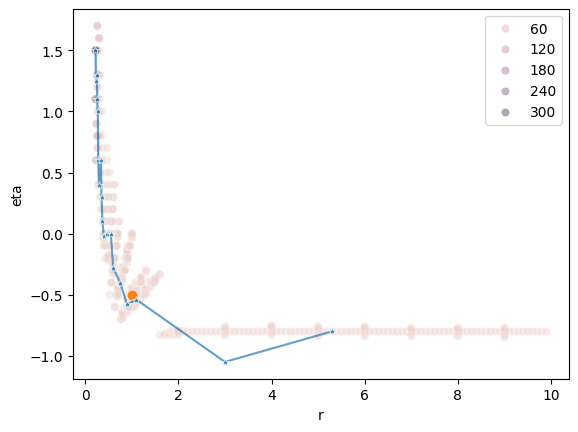

In [ ]:
group_dfs = []
for scale, df in group_cdf_df_dict.items():
    df['scale'] = scale
    group_dfs.append(df)

laplace_df = pd.concat([df[df['pass_kstest'] == True] for df in group_dfs], axis=0)
sns.scatterplot(data = laplace_df, x = 'r', y = 'eta', hue = 'scale', alpha=0.4)
sns.lineplot(data = master_df, x = 'initial_r', y = 'initial_eta', marker="*", alpha=0.7)
plt.scatter(1, -0.5)

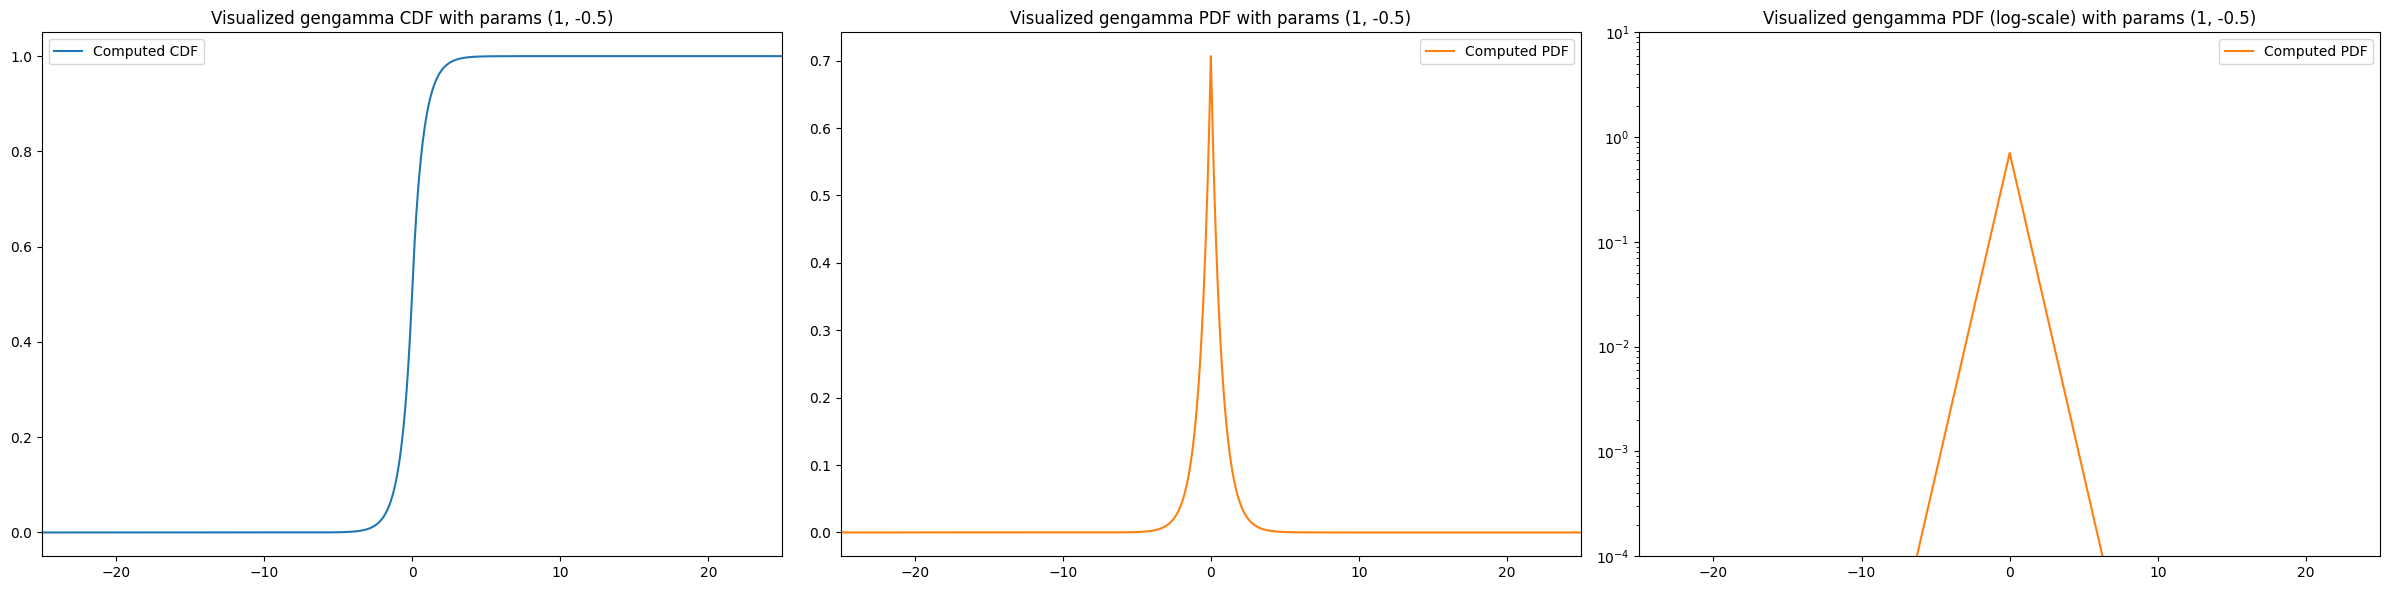

In [ ]:
visualize_cdf_pdf((1, -0.5));

### Search over $\eta=0$

In [ ]:
master_df_eta0_path = Path(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))

if RERUN or not master_df_eta0_path.exists():
    best_params_eta0 = []
    for i, group in enumerate(GROUPS):
        if master_df.loc[group, 'initial_eta'] != 0:
            sample = group_data_map[group]
            group_cdf = all_cdfs_df[all_cdfs_df['eta'] == 0]
            cdfs_dict = {i[0]:i[1] for i in group_cdf['(r,eta),cdf']}
            ksstats, best_param_eta0, kstest_stat_eta0 = gridsearch(sample, cdfs_dict, debug=True)
            master_df.loc[group, 'best_r_eta0'] = best_param_eta0[0]
            master_df.loc[group, 'kstest_stat_eta0'] = kstest_stat_eta0
        else:
            master_df.loc[group, 'kstest_stat_eta0'] = master_df.loc[group, 'kstest_stat_initial']
            master_df.loc[group, 'best_r_eta0'] = master_df.loc[group, 'initial_r']
    master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))

master_df = pd.read_csv(master_df_eta0_path, index_col=GROUP)
master_df

100%|██████████| 278/278 [00:00<00:00, 446.49it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 579.17it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 434.75it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 348.04it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 507.41it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 465.25it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 519.31it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 488.78it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 573.32it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 427.13it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 395.45it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 372.81it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 515.59it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 630.77it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 521.14it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 526.32it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 419.27it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 406.66it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:00<00:00, 539.75it/s]


Finding Minimum after computing 278 CDFs


,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,kstest_stat_cutoff_0.05,best_r_eta0,kstest_stat_eta0
layer,,,,,,,,,,,,,
0.316200,0.193357,0.160801,0.236888,3.385510,1.356045,6.731142,10000.0,3.00,-1.05,0.033979,0.013564,6.30,0.147060
0.454900,0.414368,0.341414,0.489554,2.856823,1.484867,5.035099,10000.0,5.30,-0.80,0.007779,0.013564,6.20,0.073539
0.654300,0.849068,0.697601,1.023004,3.271503,1.014398,8.106793,10000.0,1.10,-0.54,0.008450,0.013564,3.20,0.021460
0.707107,0.988003,0.821338,1.171903,2.609212,1.239022,4.613782,10000.0,0.90,-0.58,0.006937,0.013564,1.89,0.020274
0.941200,1.757791,1.465239,2.075051,2.801525,1.308895,4.589595,10000.0,0.75,-0.40,0.005472,0.013564,1.01,0.012756
1.354000,3.795530,3.143165,4.456044,2.973003,1.440938,4.982483,10000.0,0.60,-0.28,0.005800,0.013564,0.69,0.010991
1.947000,7.681313,6.443957,9.004858,2.827428,1.294215,5.011916,10000.0,0.55,0.00,0.008032,0.013564,0.55,0.008032
2.801000,15.985559,13.209583,19.097712,3.130743,1.334741,6.156874,10000.0,0.46,0.00,0.006225,0.013564,0.46,0.006225
4.030000,33.039037,27.032692,39.113258,3.058014,1.330339,7.122394,10000.0,0.40,-0.02,0.008413,0.013564,0.40,0.009506


## Optimization

In [ ]:
def simple_add_cdfs(r_range, eta_range, dir, folder_name = '', n_samples = 500, tail_bound = 0.01, tail_percent = 0.1, enforce_assert=True, return_assert = False, debug=False):

    if folder_name == '':
        folder_name = f'r{round_to_sigfigs(min(r_range))}to{round_to_sigfigs(max(r_range))}_eta{round_to_sigfigs(min(eta_range))}to{round_to_sigfigs(max(eta_range))}'

    FOLDER_PATH = os.path.join(dir, folder_name)

    if os.path.isdir(FOLDER_PATH):
        cdfs_completed = combine_pickles(FOLDER_PATH)
        if debug:
            print("CDFs completed:", len(cdfs_completed))
    else:
        Path(os.path.join(os.getcwd(), FOLDER_PATH)).mkdir()
        cdfs_completed = dict()

    n = len(r_range)*len(eta_range)
    finished = len(cdfs_completed)
    cnt = len(cdfs_completed)
    for r in r_range:
        r_cdf = dict()
        r = round_to_sigfigs(r)
        for eta in eta_range:
            eta = round_to_sigfigs(eta)
            if ((r, eta) in cdfs_completed) and cdfs_completed[(r, eta)]:
                continue
            cnt += 1
            if debug:
                print(f'{(r, eta)}, {cnt} of {n + finished}')
            if cnt % 50 == 0:
                print(f'{(r, eta)}, {cnt} of {n + finished}')

            computed_cdf = compute_prior_cdf(r = r, eta = eta, method = 'gamma_cdf', n_samples = n_samples, tail_percent = tail_percent, tail_bound = tail_bound, 
                                             enforce_assert=enforce_assert, return_assert=return_assert, debug=debug)
            r_cdf[(r, eta)] = computed_cdf
        if r_cdf:
            sorted_r_cdf = [i[1] for i in sorted(r_cdf)]
            min_eta, max_eta = round_to_sigfigs(min(sorted_r_cdf), 6), round_to_sigfigs(max(sorted_r_cdf), 6)
            pkl_path = os.path.join(FOLDER_PATH, f'r{r}_eta{min_eta}to{max_eta}.pickle')
            pd.to_pickle(r_cdf, pkl_path)
        else:
            if debug:
                print(f"Skipped {r} entirely")

    if debug:
        print(f'You can find the CDFs here: {os.path.join(os.getcwd(), FOLDER_PATH)}')

In [ ]:
master_df_optimized_path = Path(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))
rEtaKsstats_dict_path = Path(os.path.join(CWD, "cache", "rEtaKsstats_dict.pickle"))


SKIP_OPTIMIZE_STEP = True
NUM_ITERS = dict(zip(GROUPS, [1]*len(GROUPS)))
NUM_SAMPLES_OPTIMIZE = 2000

if RERUN or not master_df_optimized_path.exists():
    rEtaKsstats_dict = dict()

    if SKIP_OPTIMIZE_STEP:
        master_df['kstest_stat_best'] = master_df['kstest_stat_initial']
        master_df[f'best_r'] = master_df['initial_r']
        master_df[f'best_eta'] = master_df['initial_eta']
    else:
        for group in GROUPS: 
            print(f"{GROUP.capitalize()} {group}")
            sample = group_data_map[group]
            initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
            r_granularity = 10
            eta_granularity = 10
            for i in range(0, -5, -1):
                if tuple([round_to_sigfigs(initial_r + 10.**i, 8), initial_eta]) in all_cdfs:
                    r_granularity = 10.**i
                if tuple([initial_r, round_to_sigfigs(initial_eta + 10.**i, 8)]) in all_cdfs:
                    
                    eta_granularity = 10.**i

            for d in range(1, NUM_ITERS[group] + 1):
                if d == 1:
                    initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
                else:
                    initial_r, initial_eta = master_df.loc[group, f'iter{d - 1}_r'], master_df.loc[group, f'iter{d - 1}_eta']
                r_granularity = r_granularity * 10.0**(-d+1) 
                eta_granularity = eta_granularity * 10.0**(-d+1) 

                r_range = [round_to_sigfigs(x) for x in np.arange(initial_r - r_granularity, initial_r + r_granularity, r_granularity/10)]
                eta_range = [round_to_sigfigs(x) for x in np.arange(initial_eta - eta_granularity, initial_eta + eta_granularity, eta_granularity/10)]
                simple_add_cdfs(r_range, eta_range, dir = os.path.join(CWD, "groupCDFs"), folder_name=f'{GROUP}{group}', n_samples = NUM_SAMPLES_OPTIMIZE, debug=False, tail_bound=1e-5)
                cdfs_dict = combine_pickles(os.path.join(CWD, "groupCDFs", f'{GROUP}{group}'))
                ksstats, best_param, kstest_stat = gridsearch(sample, cdfs_dict, debug=True)

                temp_df = create_kurt_var_ksstat_df(cdfs_dict)
                temp_df = add_tests_to_df(cdfs_df=temp_df, group=group, var_kurt_df=master_df, ksstats=ksstats)
                
                group_cdf_df_dict[group] = pd.concat([group_cdf_df_dict[group], temp_df])
                master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta'] = best_param[0], best_param[1]
                master_df.loc[group, 'kstest_stat_best'] = kstest_stat
                master_df.loc[group, f'iter{d}_r'], master_df.loc[group, f'iter{d}_eta'] = best_param[0], best_param[1]
                master_df.loc[group, f'kstest_stat_iter{d}'] = kstest_stat
                
                print(f"Iter {d} {GROUP} {group} best parameters: {best_param, master_df.loc[group, f'kstest_stat_iter{d}']}")

            temp_df = group_cdf_df_dict[group].sort_values(['r', 'eta'])
            rEtaKsstats_dict[group] = [temp_df['r'], temp_df['eta'], temp_df['ksstat']]

            eps = 0.1
            filtered_df = temp_df[(temp_df['r'] > master_df.loc[group, 'initial_r'] - eps) & 
                            (temp_df['r'] < master_df.loc[group, 'initial_r'] + eps) &
                            (temp_df['eta'] > master_df.loc[group, 'initial_eta'] - eps) &
                            (temp_df['eta'] < master_df.loc[group, 'initial_eta'] + eps)]
            cols = ['pass_var', 'pass_kstest', 'pass_kurt']
            fig = combo_test_plot(filtered_df, cols, 
                                plot_name=f"{GROUP.capitalize()} {group} zoomed in: {', '.join([col[5:].capitalize() for col in cols])}",
                                best_param=(master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta']))
            fig.figure.savefig(os.path.join(CWD, "plots", f"optimized_full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)
            
    master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_best'], row.loc['total_samples']), axis = 1)    
    master_df[['total_samples', 'initial_r', 'initial_eta', 'kstest_stat_initial', 'best_r', 'best_eta', 'kstest_stat_best', 'n_pval_0.05']].to_csv(os.path.join(CWD, "CSVs", 'optimized_params.csv'))
    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))
    pd.to_pickle(rEtaKsstats_dict, os.path.join(CWD, "cache", 'rEtaKsstats_dict.pickle'))

master_df = pd.read_csv(master_df_optimized_path, index_col = GROUP)
master_df

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,kstest_stat_cutoff_0.05,best_r_eta0,kstest_stat_eta0,kstest_stat_best,best_r,best_eta,n_pval_0.05
layer,,,,,,,,,,,,,,,,,
0.316200,0.193357,0.160801,0.236888,3.385510,1.356045,6.731142,10000.0,3.00,-1.05,0.033979,0.013564,6.30,0.147060,0.033979,3.00,-1.05,1579
0.454900,0.414368,0.341414,0.489554,2.856823,1.484867,5.035099,10000.0,5.30,-0.80,0.007779,0.013564,6.20,0.073539,0.007779,5.30,-0.80,32035
0.654300,0.849068,0.697601,1.023004,3.271503,1.014398,8.106793,10000.0,1.10,-0.54,0.008450,0.013564,3.20,0.021460,0.008450,1.10,-0.54,25312
0.707107,0.988003,0.821338,1.171903,2.609212,1.239022,4.613782,10000.0,0.90,-0.58,0.006937,0.013564,1.89,0.020274,0.006937,0.90,-0.58,37968
0.941200,1.757791,1.465239,2.075051,2.801525,1.308895,4.589595,10000.0,0.75,-0.40,0.005472,0.013564,1.01,0.012756,0.005472,0.75,-0.40,64071
1.354000,3.795530,3.143165,4.456044,2.973003,1.440938,4.982483,10000.0,0.60,-0.28,0.005800,0.013564,0.69,0.010991,0.005800,0.60,-0.28,56952
1.947000,7.681313,6.443957,9.004858,2.827428,1.294215,5.011916,10000.0,0.55,0.00,0.008032,0.013564,0.55,0.008032,0.008032,0.55,0.00,28476
2.801000,15.985559,13.209583,19.097712,3.130743,1.334741,6.156874,10000.0,0.46,0.00,0.006225,0.013564,0.46,0.006225,0.006225,0.46,0.00,48052
4.030000,33.039037,27.032692,39.113258,3.058014,1.330339,7.122394,10000.0,0.40,-0.02,0.008413,0.013564,0.40,0.009506,0.008413,0.40,-0.02,25312


## Comparing Empirical and Computed CDF/PDF

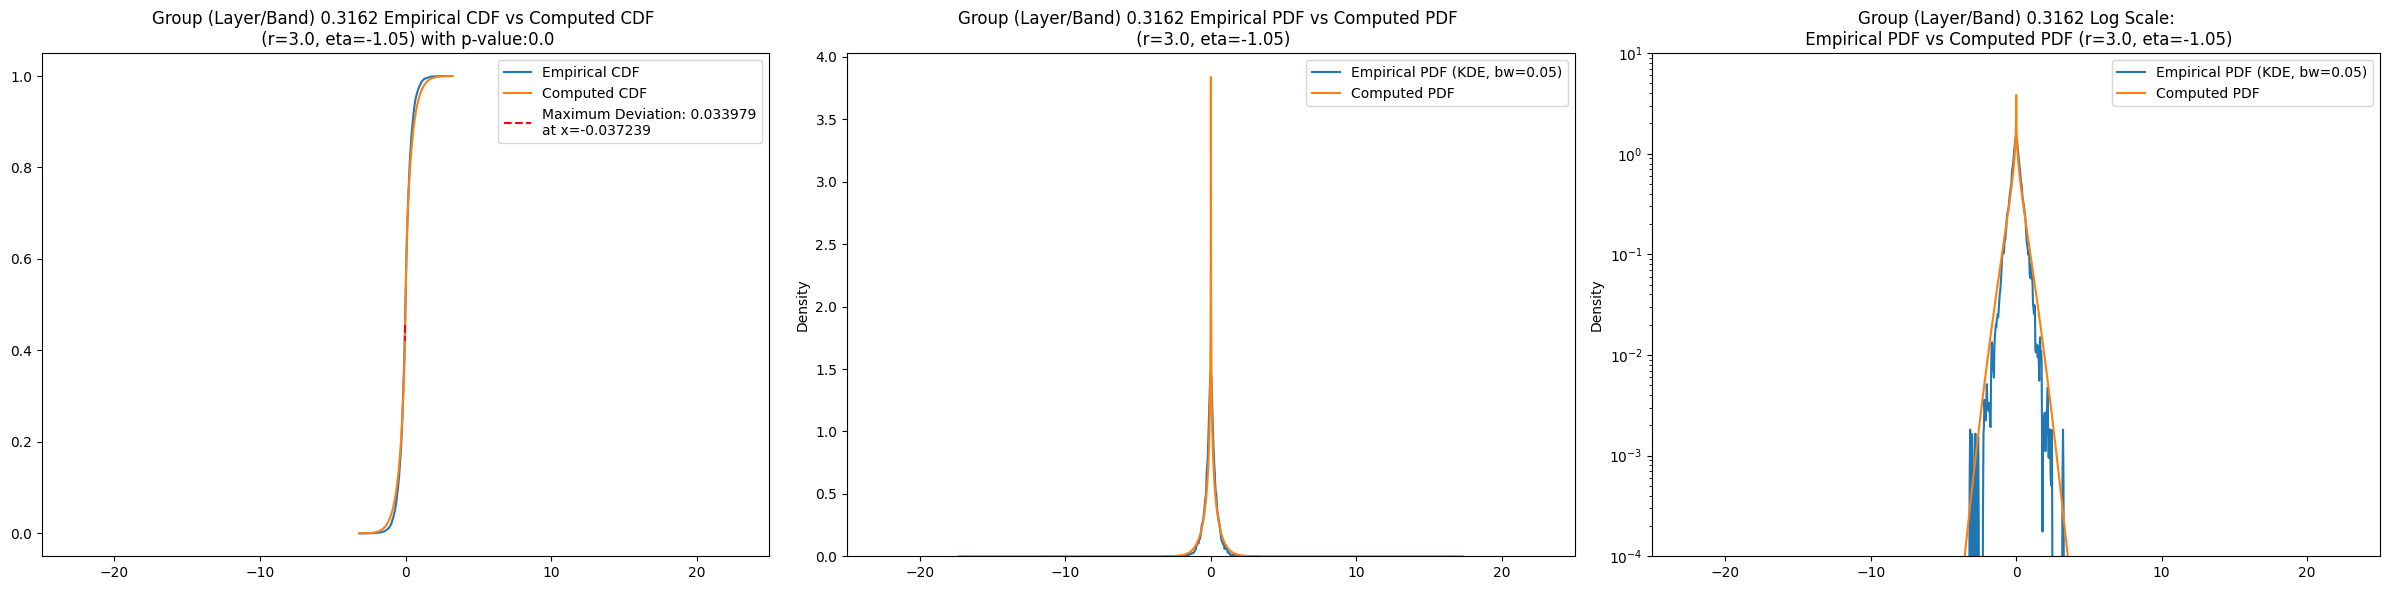

c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\plotting.py:437: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


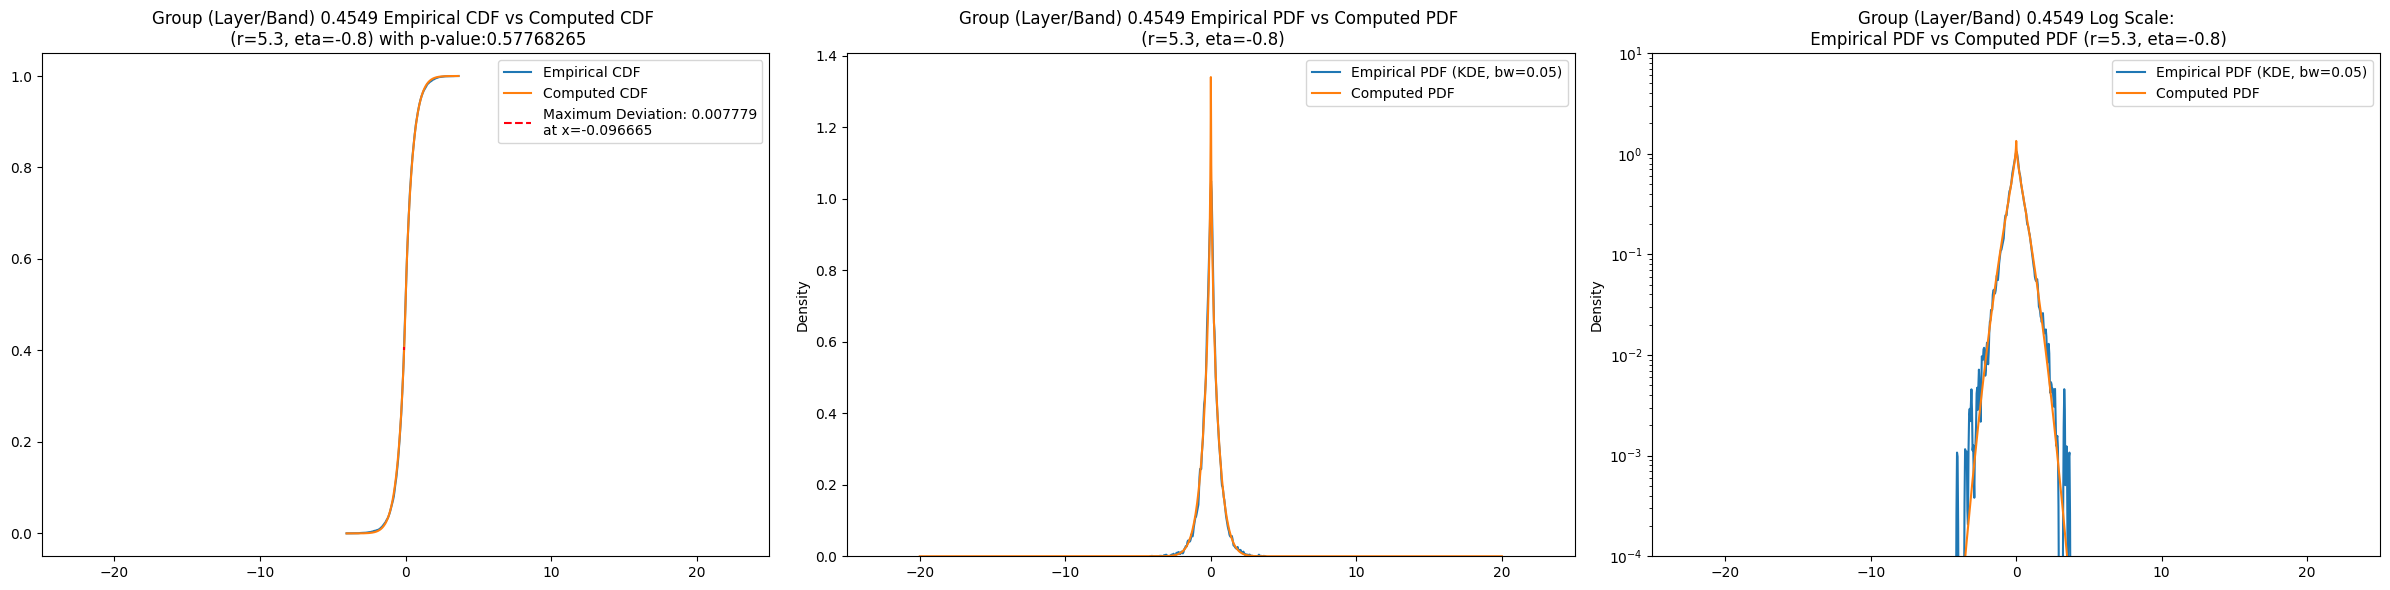

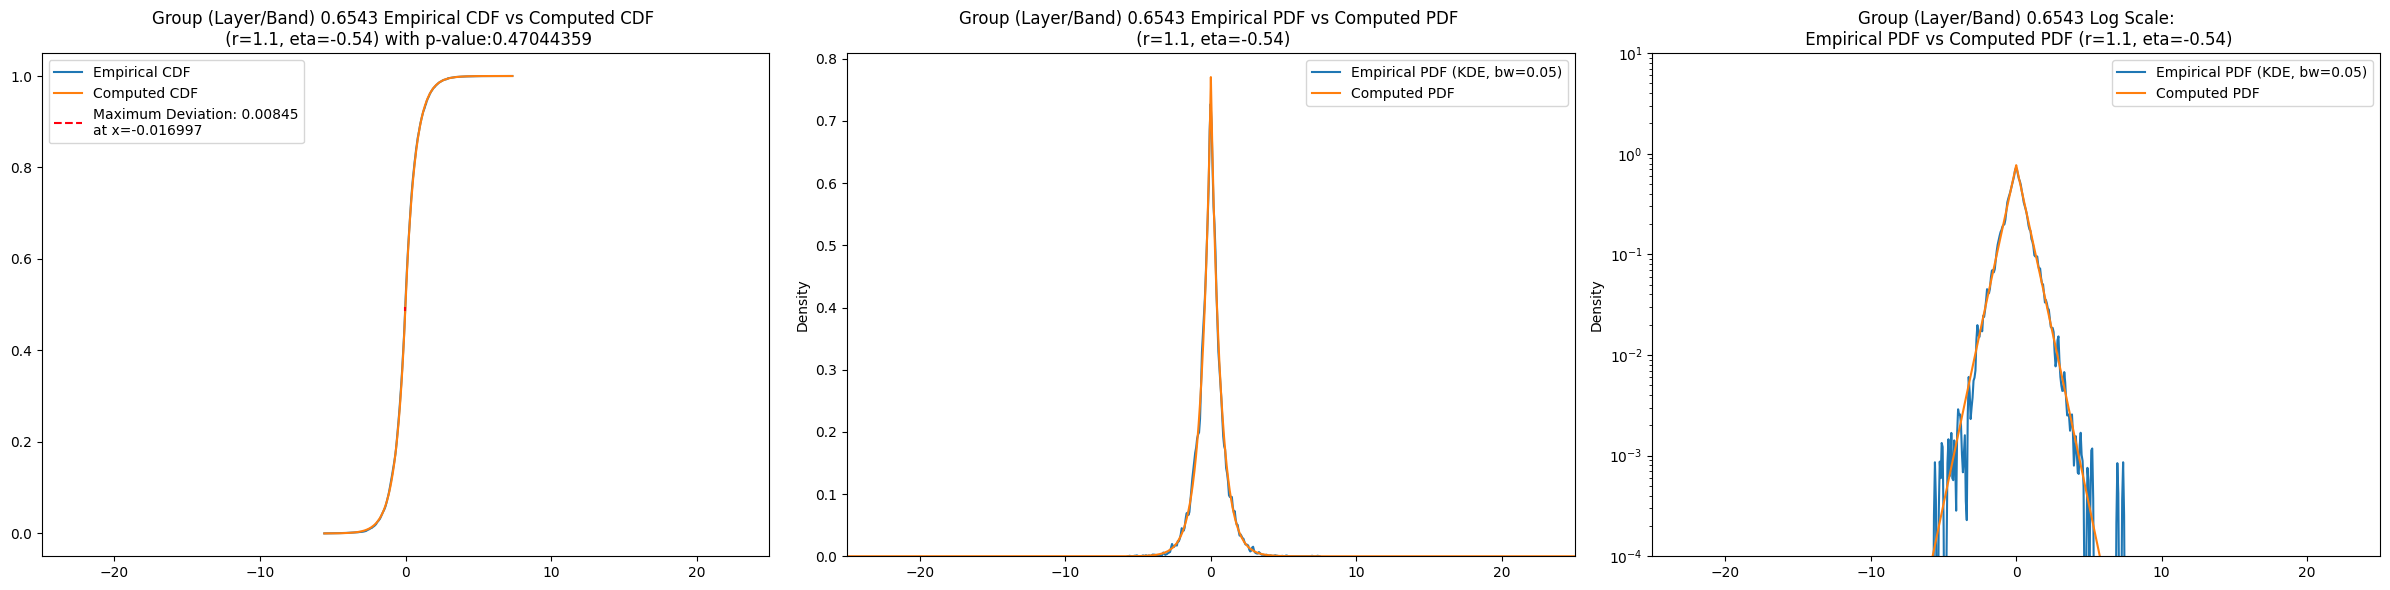

C:\Users\yashd\AppData\Local\Temp\ipykernel_17624\1947674508.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 300)


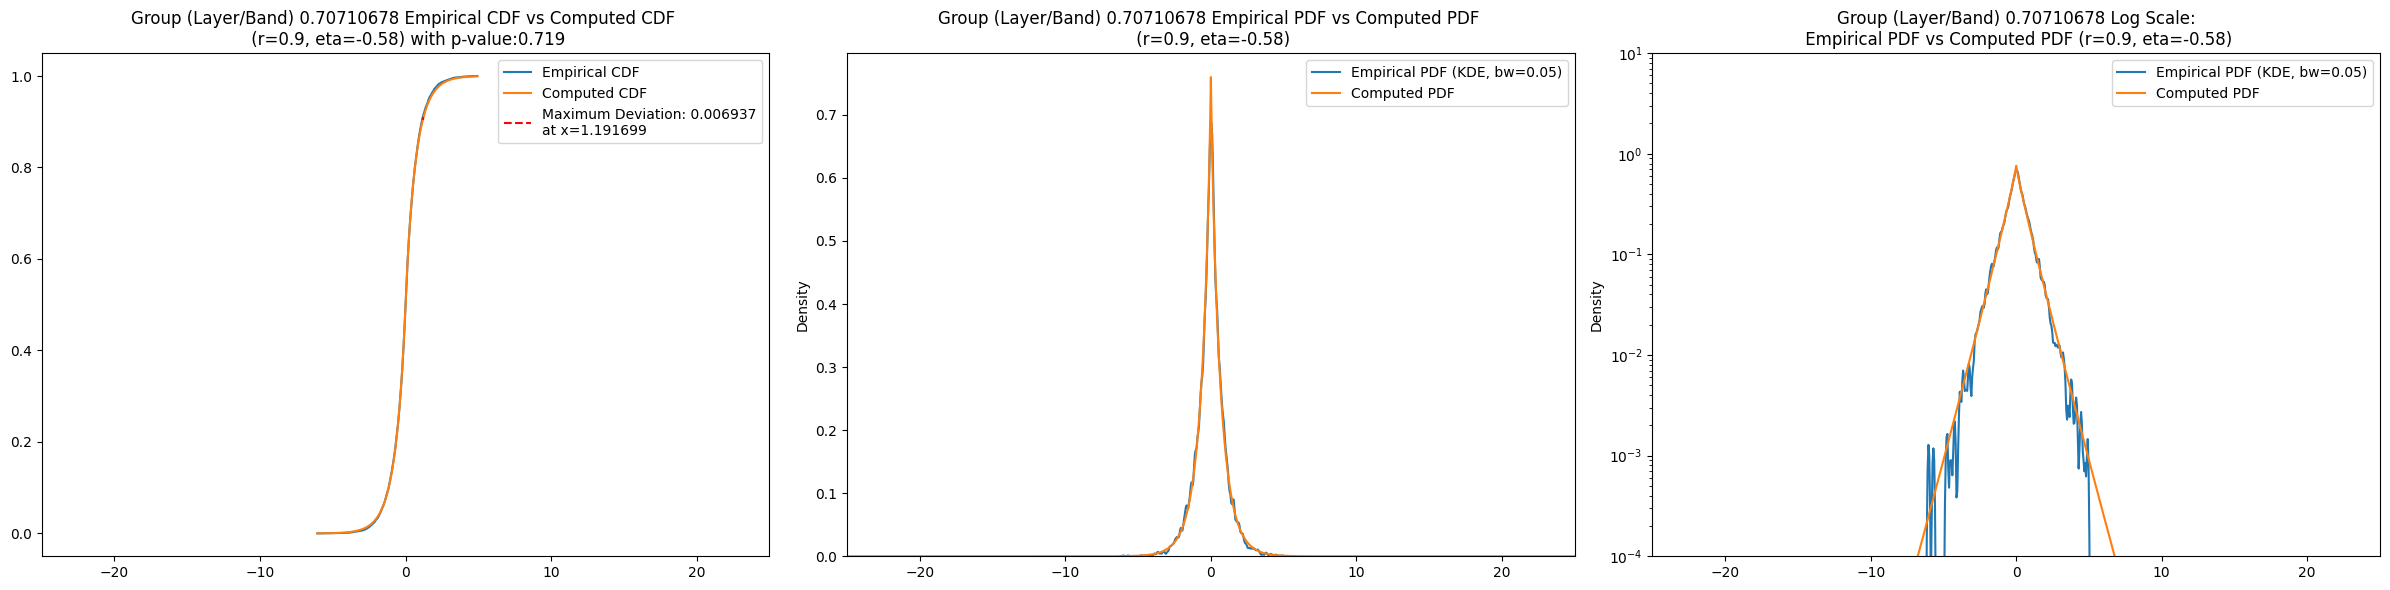

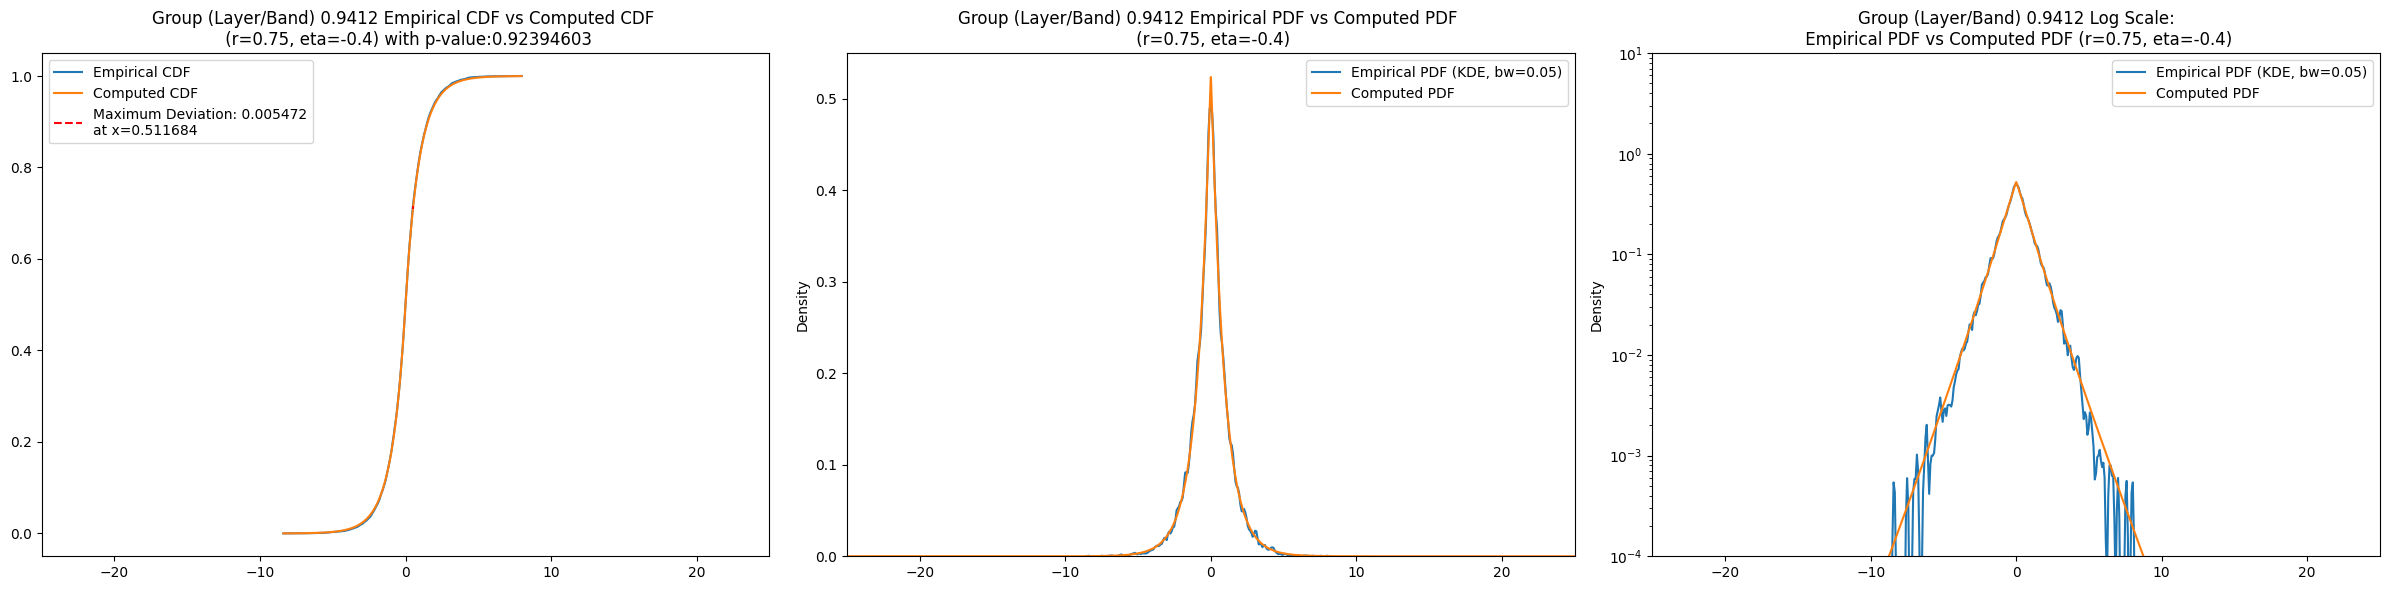

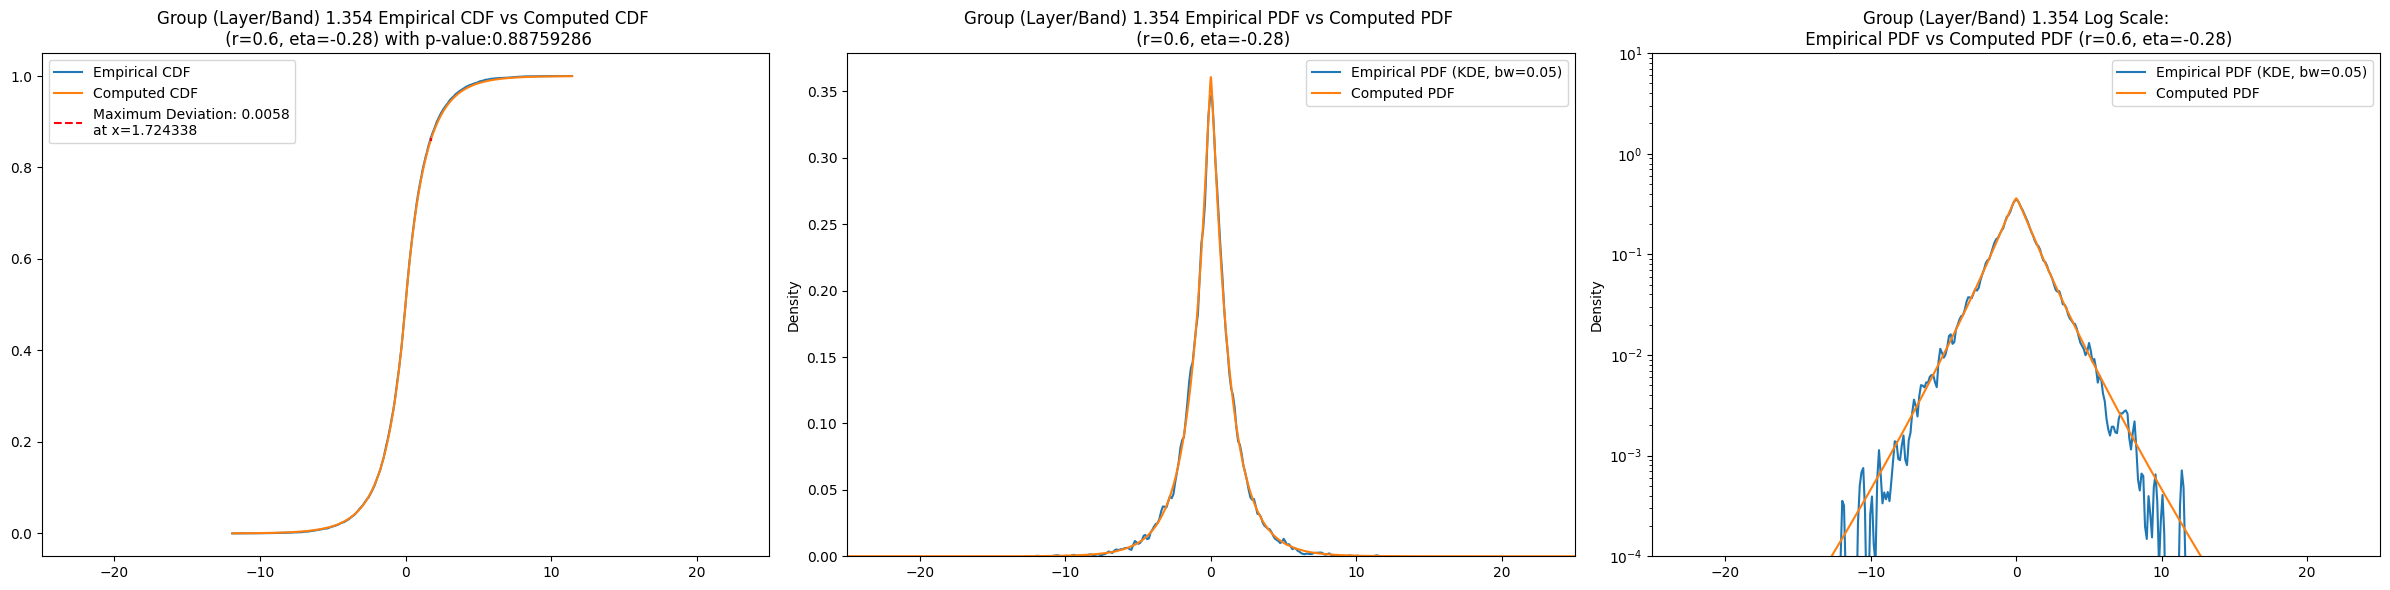

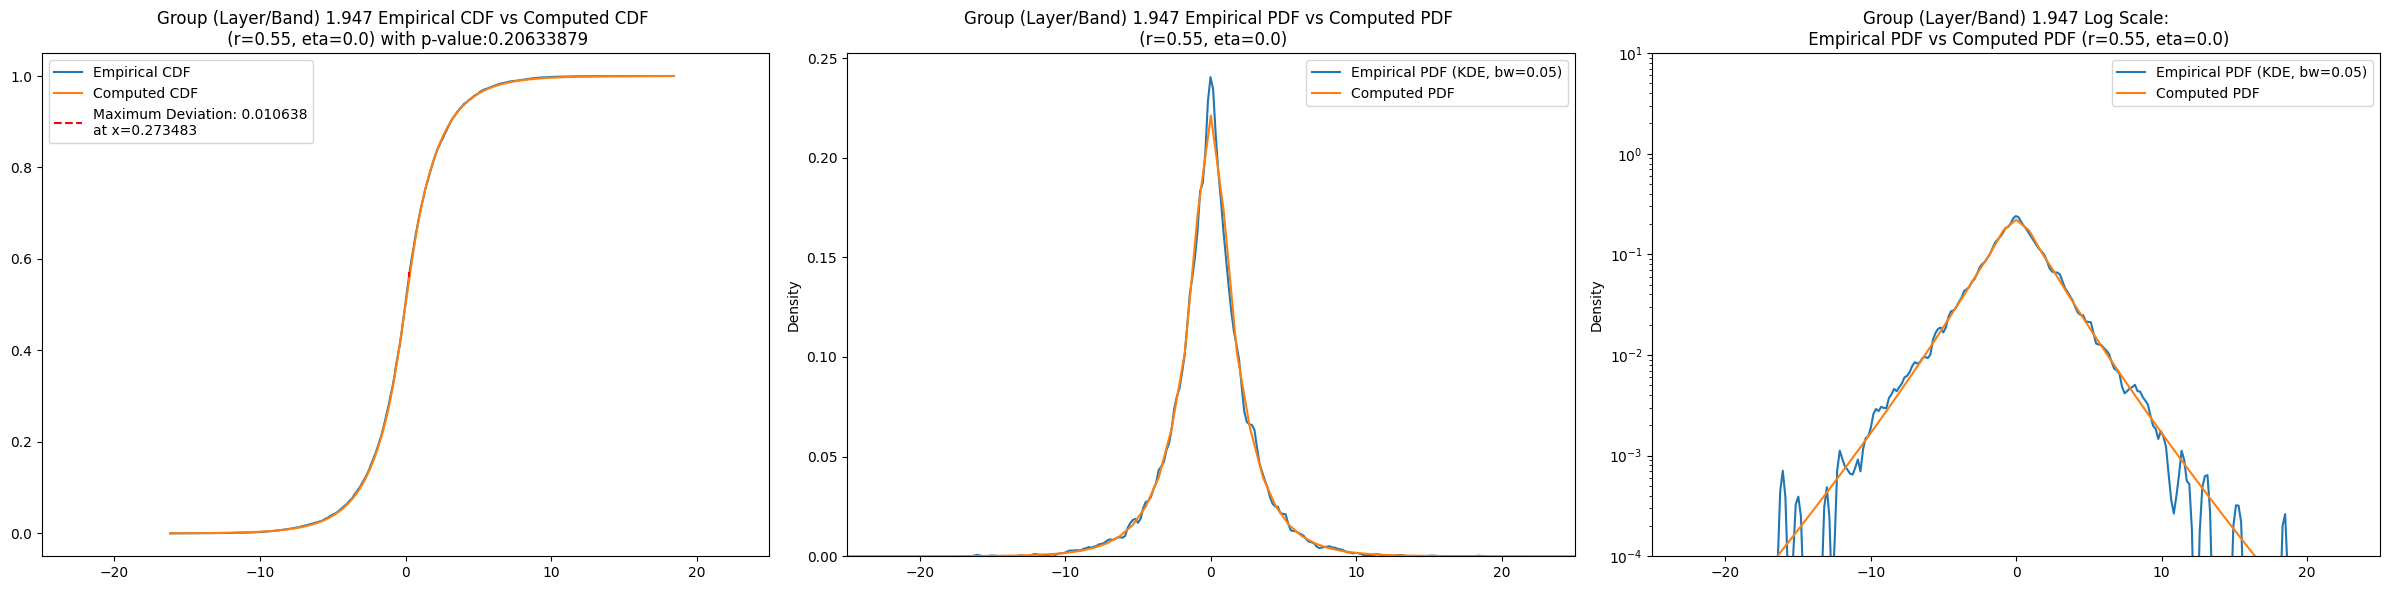

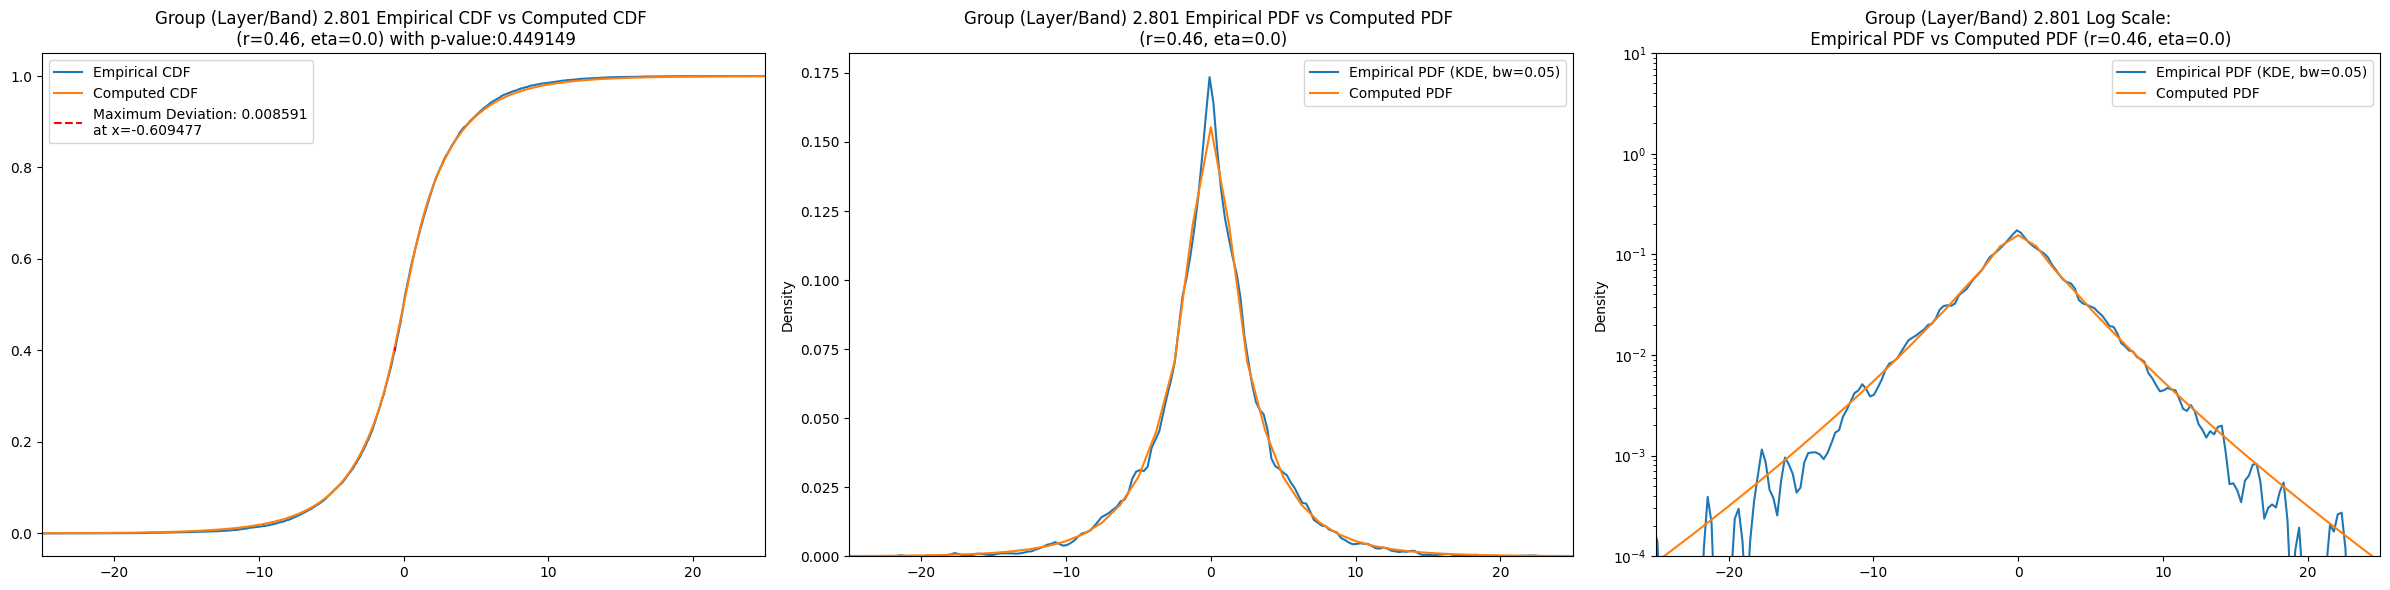

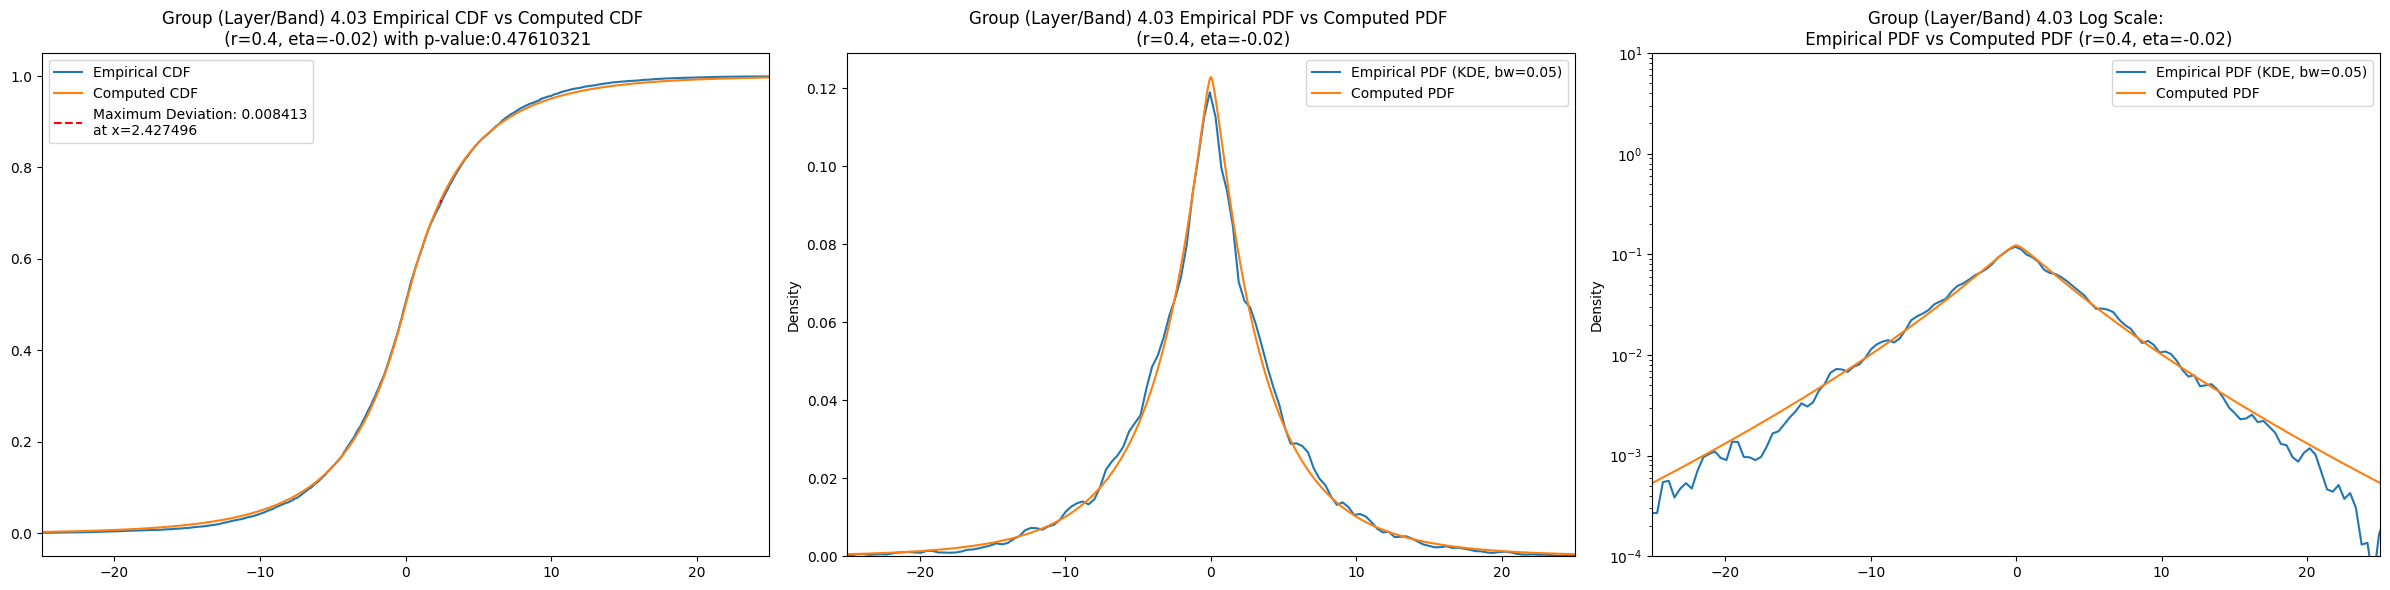

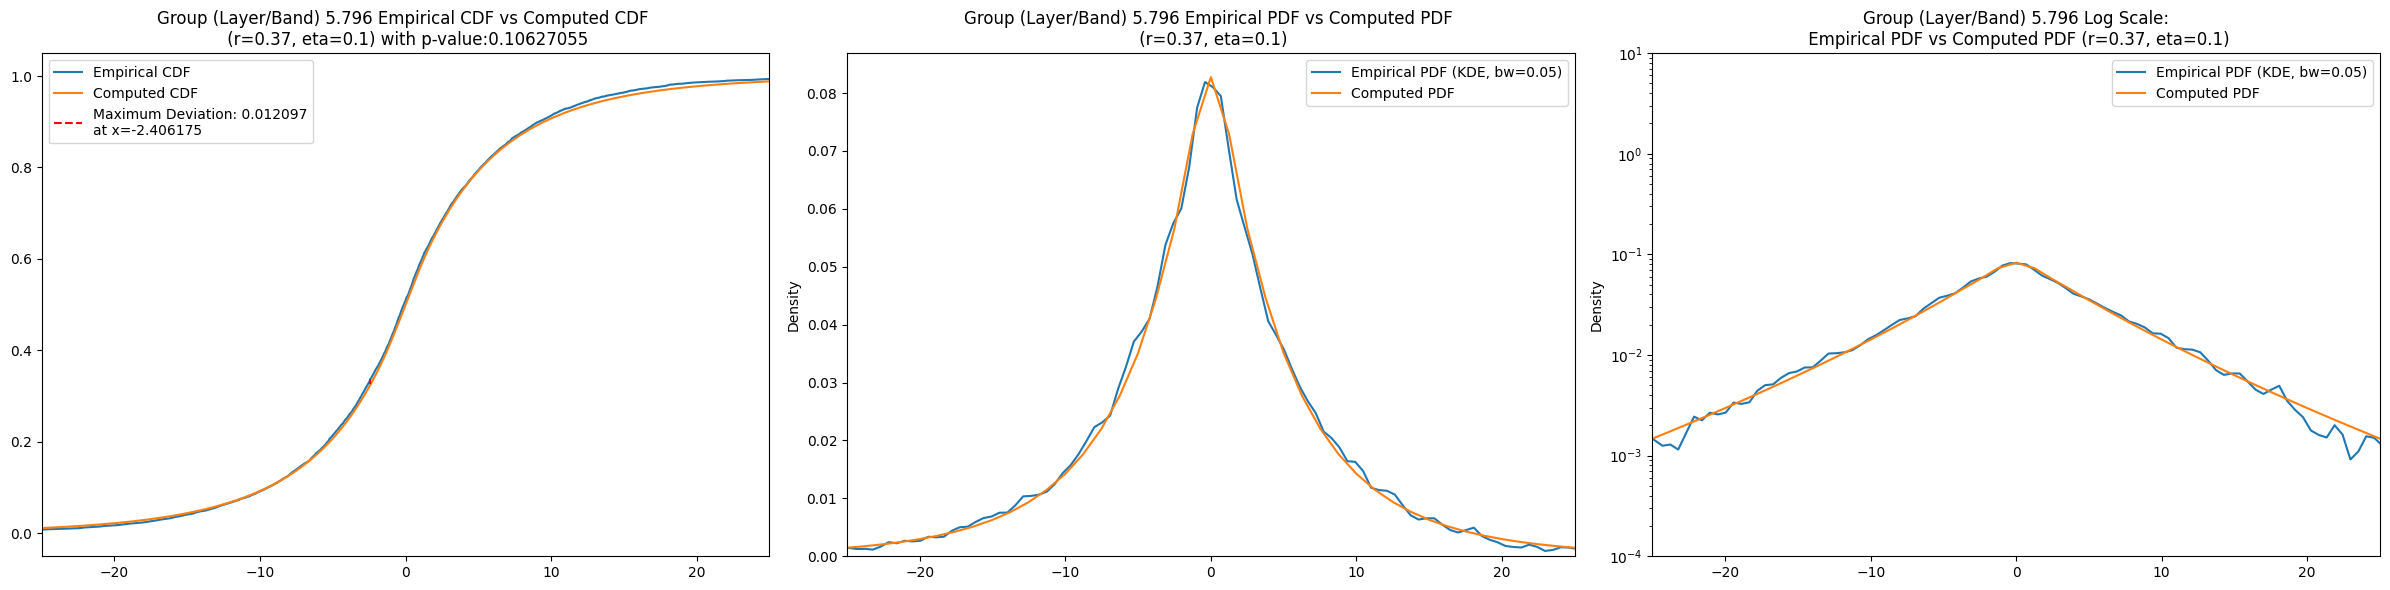

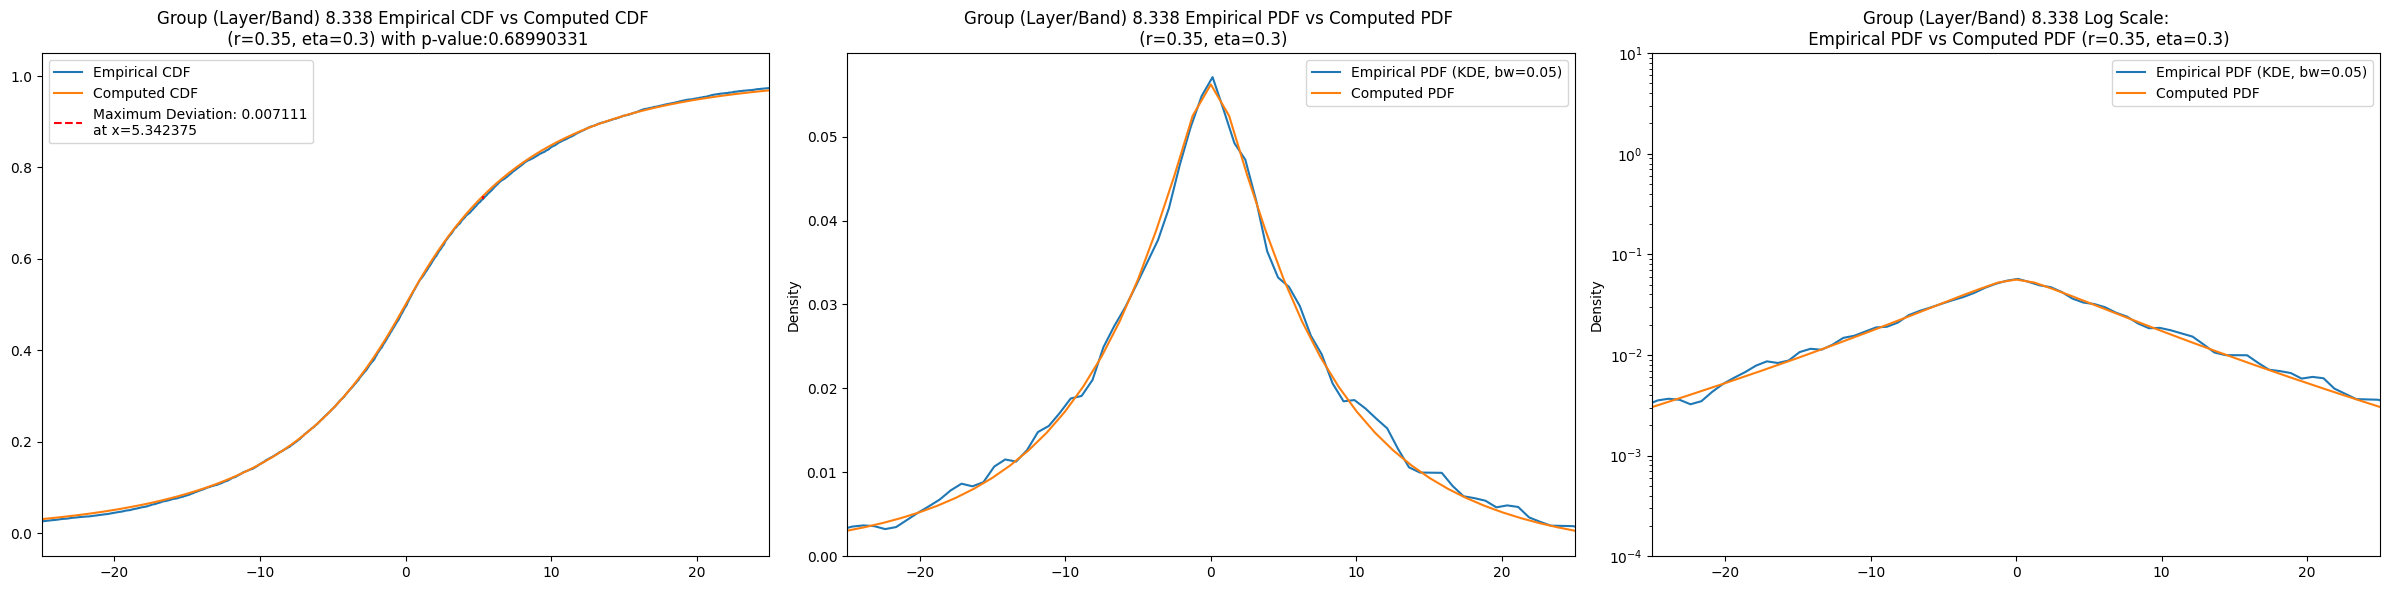

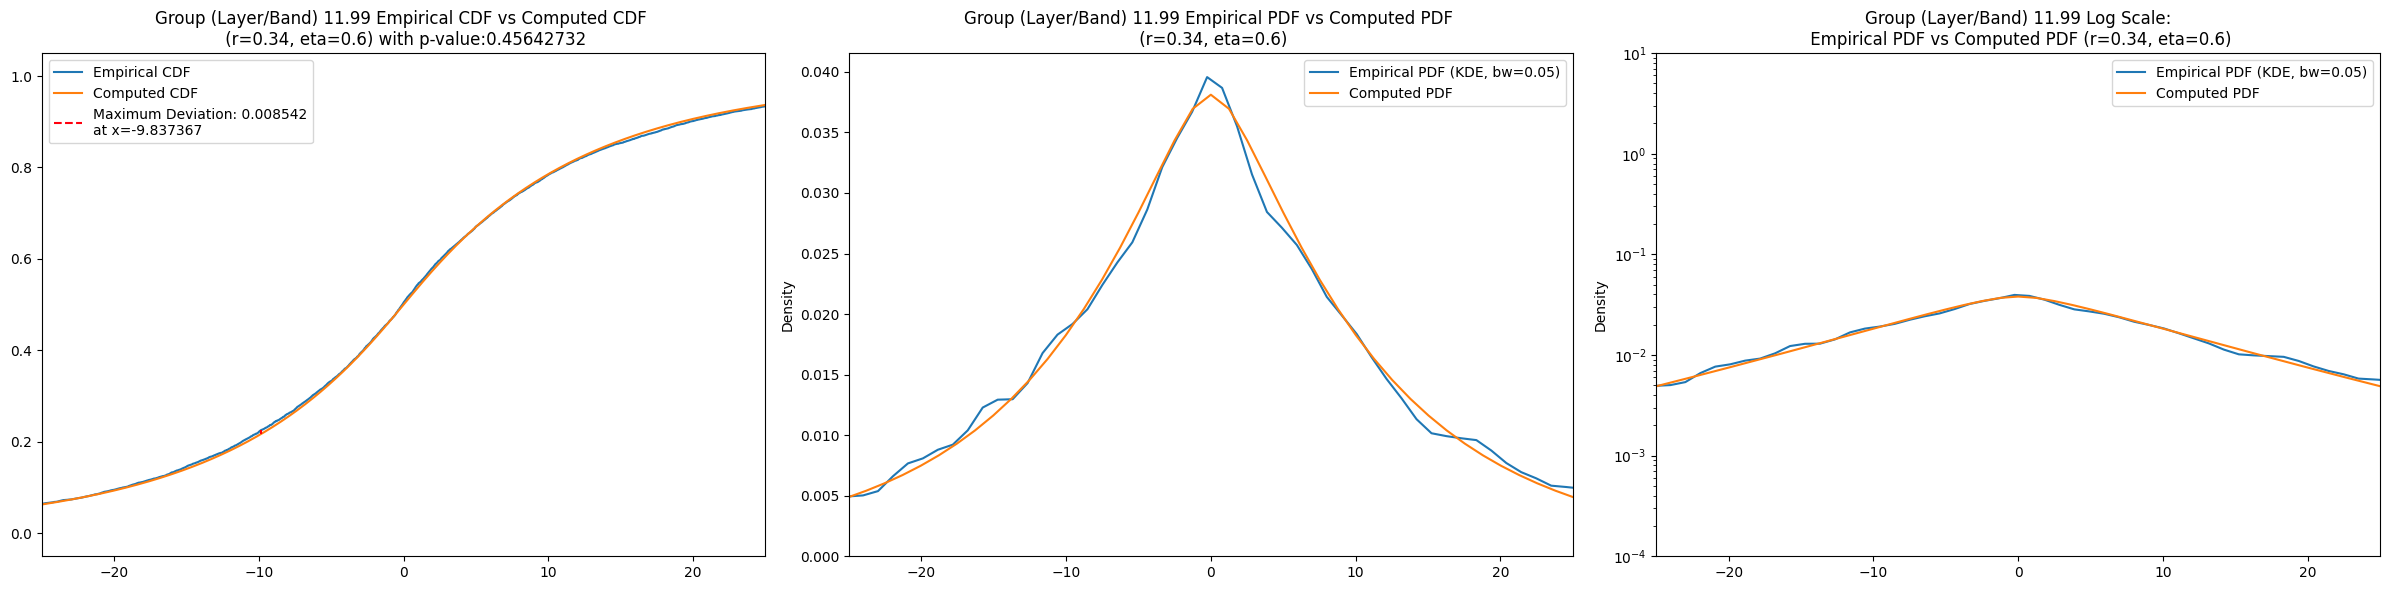

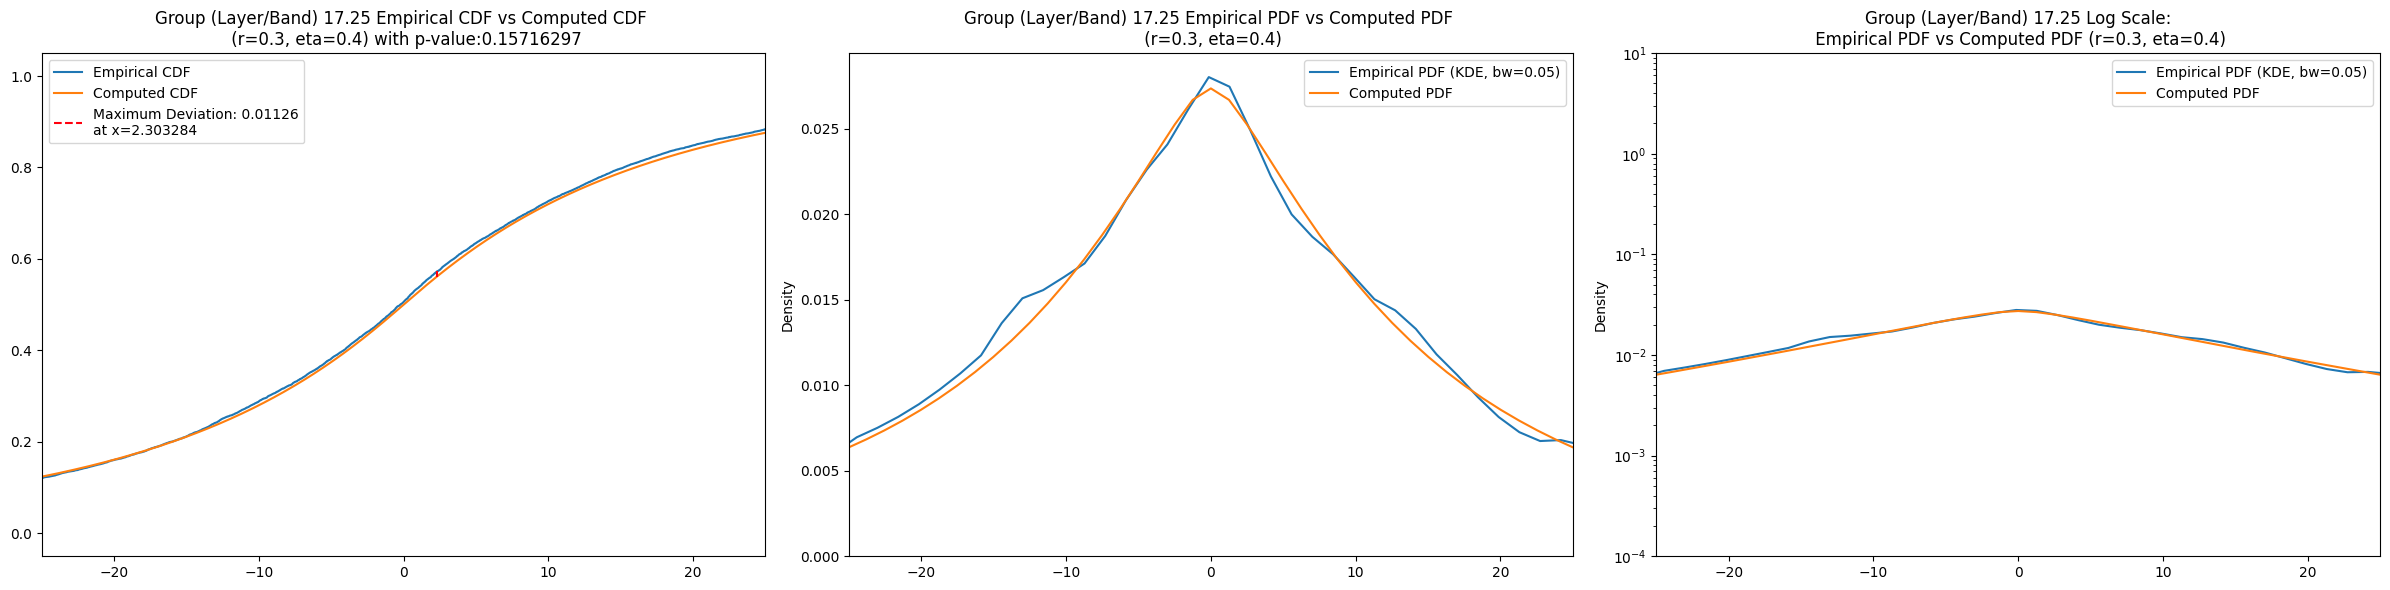

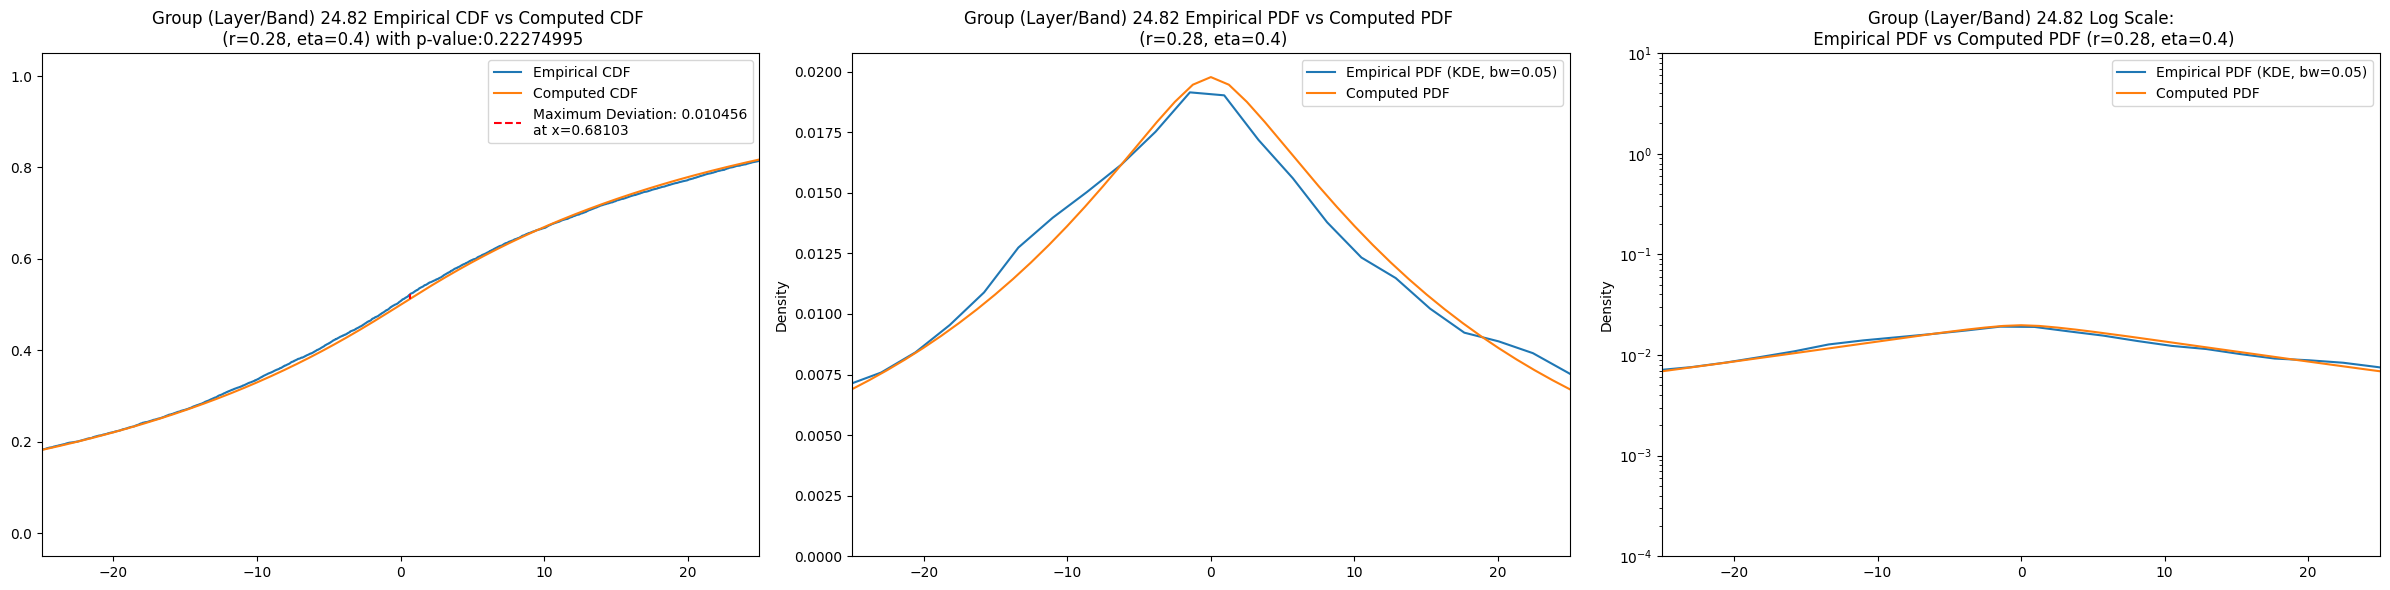

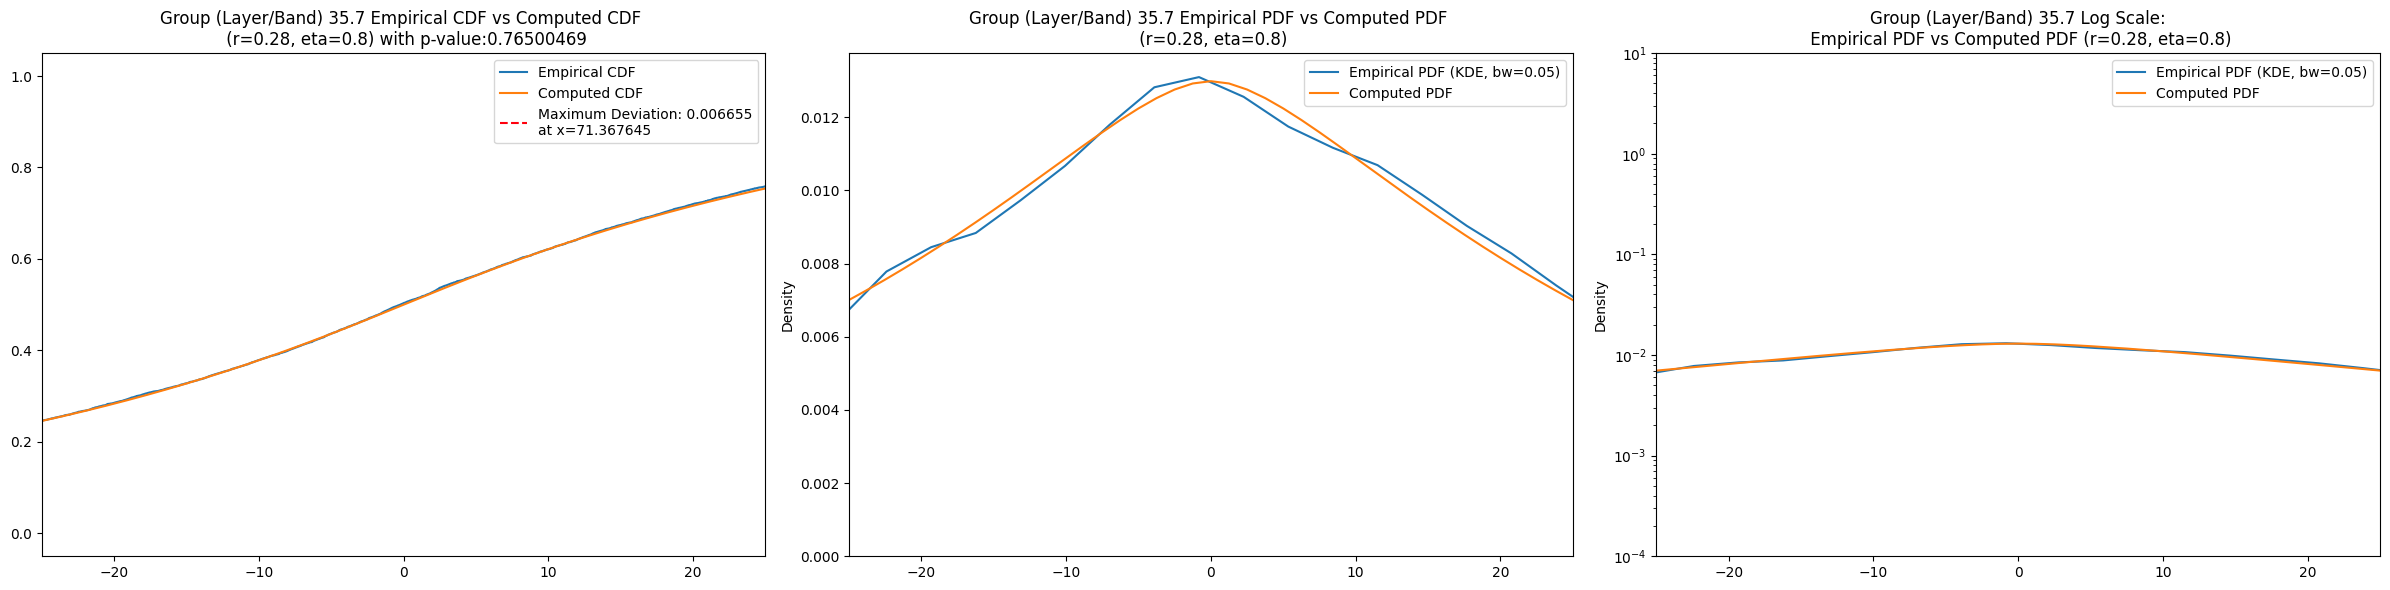

In [ ]:
for group in GROUPS:
    group_info = master_df.loc[group]
    best_r = group_info['best_r']
    best_eta = group_info['best_eta']
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (best_r, best_eta), 
                    log_scale = True,
                    group = group,
                    n_samples=200
                    #interval = (-500, 500),
                    #provided_loc=200
                    )
    fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 300)

## Comparing with Gaussian and Laplace Priors

In [ ]:
def generate_func(sample, distro, *args, n_samples=200):
    if distro == 'gaussian' or distro == 'normal':
        def var_func(var):
            cdf = scipy.stats.norm(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'laplace':
        def var_func(var):
            cdf = scipy.stats.laplace(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 't':
        def var_func(var):
            cdf = scipy.stats.t(df=2, scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'prior_r':
        eta = args[0]
        def r_func(r):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return r_func
    elif distro == 'prior_eta':
        r = args[0]
        def eta_func(eta):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return eta_func
    elif distro == 'prior':
        def r_eta_func(params):
            r = params[0]
            eta = params[1]
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample, cdf)
        return r_eta_func

    print("Please enter a valid argument for `distro`: 'gaussian', 'laplace', 'prior_r', 'prior_eta', 'prior', 't'")

In [ ]:
master_df_path = Path(os.path.join(CWD, "CSVs", 'master_df.csv'))

if RERUN or not master_df_path.exists():
    upper_bound = int(1e6)
    for group in GROUPS:
        norm_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'gaussian'), method = 'bounded', bounds = (0, upper_bound))
        laplace_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'laplace'), method = 'bounded', bounds = (0, upper_bound))
        t_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 't'), method = 'bounded', bounds = (0, upper_bound))
        
        master_df.loc[group, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
        master_df.loc[group, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_gaussian']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6) 

        master_df.loc[group, 'param_t'] = round_to_sigfigs(t_result['x'], 6)
        master_df.loc[group, 'kstest_stat_t'] = round_to_sigfigs(t_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_t'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_t']), 6) 

        master_df.loc[group, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_best']))

    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))
    
master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
master_df

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,...,param_gaussian,kstest_stat_gaussian,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma
layer,,,,,,,,,,,,,,,,,,,,,
0.316228,2.020635,1.665660,2.496361,3.640534,1.351687,10.834413,10000.0,0.70,-0.43,0.006965,...,1.13500,0.034545,8.373300e-11,0.991538,0.008003,0.540990,0.827609,0.012876,0.071977,0.714335
0.428133,2.062923,1.707876,2.491743,3.441116,1.487693,6.760932,10000.0,0.76,-0.30,0.006005,...,1.13784,0.031280,6.187850e-09,1.017940,0.006222,0.831169,0.835740,0.011997,0.111535,0.861415
0.579639,2.031453,1.685249,2.425872,2.794407,1.473545,4.834269,10000.0,0.70,-0.40,0.007573,...,1.13744,0.031759,3.380740e-09,1.016150,0.007298,0.658450,0.834978,0.012166,0.102765,0.612158
0.784760,2.002073,1.666376,2.364415,2.747648,1.251152,5.237997,10000.0,0.75,-0.30,0.007148,...,1.15048,0.029667,4.430940e-08,1.020410,0.005937,0.870322,0.850606,0.013463,0.052806,0.683649
1.062468,1.931009,1.601379,2.300838,2.834055,1.308186,6.950448,10000.0,0.77,-0.30,0.004816,...,1.12518,0.030014,2.925430e-08,0.995086,0.004503,0.986776,0.812252,0.012301,0.096208,0.973678
1.438450,1.986418,1.635356,2.348724,3.048729,1.599415,5.006369,10000.0,0.70,-0.44,0.010112,...,1.08142,0.035645,1.785310e-11,0.960363,0.010507,0.218052,0.802983,0.017452,0.004470,0.256429
1.947483,2.003894,1.658146,2.428211,3.408381,1.495841,7.365279,10000.0,0.78,-0.30,0.008889,...,1.11317,0.033654,2.825950e-10,0.993629,0.009706,0.300948,0.823901,0.012937,0.069732,0.405897
2.636651,2.004445,1.650517,2.393209,2.902484,1.230690,7.704358,10000.0,0.70,-0.41,0.006679,...,1.13170,0.033099,5.934610e-10,0.997393,0.007444,0.633872,0.832554,0.014318,0.032833,0.761159
3.569699,2.050520,1.704996,2.414596,3.030093,1.541536,5.086442,10000.0,0.76,-0.30,0.005125,...,1.16010,0.031637,3.949900e-09,1.006450,0.005424,0.928648,0.830506,0.013289,0.057962,0.954200


In [ ]:
# def add_metric_tail(metric_name = 'kstest_ratio',  distro = 'gengamma', tail_cutoffs = [0], layers = np.arange(2, 9)):
#     if metric_name == 'kstest_ratio':
#         metric = compute_ksratio
#     elif metric_name == 'kstest_stat':
#         metric = compute_ksstat_tail

#     for tail_cutoff in tail_cutoffs:
#         metrics = []
#         for layer in layers:
#             if distro == 'gengamma':
#                 cdf = all_cdfs[(master_df.loc[layer, 'initial_r'], master_df.loc[layer, 'initial_eta'])]
#             elif distro == 'gaussian':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_gaussian']).cdf
#             elif distro == 'laplace':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_laplace']).cdf
#             elif distro == 't':
#                 cdf = scipy.stats.t(df = 2, scale = master_df.loc[layer, 'param_t']).cdf
#             metrics.append(metric(group_data_map[layer], cdf, tail_cutoff = tail_cutoff))
#         master_df[metric_name + '_' + distro + '_' + f'tail{tail_cutoff}'] = metrics
        
# for group in GROUPS:
#     add_metric_tail('kstest_ratio', distro = 'gengamma', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 'gaussian', tail_cutoffs= [0,10], layers = np.arange(2, 9)) 
#     add_metric_tail('kstest_ratio', distro = 'laplace', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 't', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_stat', distro = 'gengamma', tail_cutoffs= [2, 10], layers = np.arange(2, 9))

# master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))

# master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
# master_df

## Results

In [ ]:
import pandas as pd
import os
master_df = pd.read_csv(os.path.join(os.getcwd(), "CSVs", 'master_df.csv'), index_col = 0)

In [ ]:
master_df#.filter(regex='total_samples|kstest_stat.*')
#master_df.filter(regex='total_samples|param.*')
# master_df.filter(regex='.*gaussian')
#master_df.filter(regex='kstest_stat_.*[\_(tail\d)]')
#master_df.filter(regex='.*_tail\d\d?')
#master_df.filter(regex='.*_t_.*')


,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,...,param_gaussian,kstest_stat_gaussian,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma
layer,,,,,,,,,,,,,,,,,,,,,
2,2.509465,2.394228,2.627987,1.269581,0.895752,1.774415,10000.0,0.93,0.7,0.003729,...,1.45605,0.015478,0.016432,1.282180,0.017315,4.919390e-03,1.028790,0.021612,1.726870e-04,0.999704
3,5.007770,4.790005,5.230257,0.941049,0.696570,1.212222,10000.0,0.82,1.5,0.004459,...,2.07563,0.015429,0.016931,1.846140,0.018364,2.324490e-03,1.463280,0.022970,5.139560e-05,0.994733
4,24.856175,23.734480,25.998470,1.124323,0.845124,1.427006,10000.0,0.62,2.8,0.005653,...,4.59054,0.014146,0.036215,4.109060,0.019448,1.023000e-03,3.337540,0.022781,6.115350e-05,0.914446
5,1.244630,1.188862,1.301903,1.100883,0.804508,1.422297,10000.0,1.62,0.9,0.005402,...,1.02676,0.014015,0.038974,0.921151,0.021504,1.896410e-04,0.742795,0.023281,3.855410e-05,0.937444
6,14.893657,14.248863,15.553942,0.884322,0.653904,1.128470,10000.0,0.70,3.1,0.011846,...,3.59276,0.014575,0.028287,3.320570,0.029175,7.907410e-08,2.687390,0.027233,7.084540e-07,0.121086
7,30.009604,28.694512,31.361411,0.986986,0.717404,1.285661,10000.0,0.67,4.7,0.006152,...,5.12386,0.011714,0.127513,4.577980,0.023892,2.164740e-05,3.698550,0.025161,6.224910e-06,0.858605
8,149.334302,143.016366,155.764761,0.716278,0.501243,0.958552,10000.0,0.52,5.3,0.008917,...,11.46930,0.014337,0.032477,10.343800,0.025281,5.515080e-06,8.509400,0.026881,1.038000e-06,0.401945
9,7.508410,7.183794,7.845591,0.873762,0.609135,1.180370,10000.0,0.83,2.8,0.003864,...,2.58967,0.011286,0.155330,2.290920,0.021756,1.524990e-04,1.839980,0.023790,2.387010e-05,0.999141
